In [1]:
import pandas as pd

csv_file = 'QUBOClusteringData.csv'

df = pd.read_csv(csv_file)

df.head()

,tsolve,alg,nvars,seed,runseed
0,8.0,UEDA,5,1,1
1,7.0,GR,5,1,1
2,13.0,RS,5,1,1
3,73.0,UEDA,5,1,2
4,4.0,GR,5,1,2


In [5]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

fill_value = -1  # Setzen Sie hier einen geeigneten Wert für die Füllung ein
df['tsolve_filled'] = df['tsolve'].fillna(value=fill_value)

df['has_solution'] = (df['tsolve_filled'] != fill_value).astype(int)

df_with_solution = df[df['has_solution'] == 1]

# Features auswählen
features = ['nvars', 'seed', 'runseed', 'has_solution']

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(df_with_solution[features], df_with_solution['tsolve'], test_size=0.2, random_state=42)

# XGBoost-Modell für Regression initialisieren und trainieren
model = XGBRegressor()
model.fit(X_train, y_train)

# Vorhersagen für die Testdaten machen
predictions = model.predict(X_test)

# Evaluieren Sie die Leistung des Modells
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Vorhersagen für rechtszensierte Daten machen
rechtszensierte_daten = df[df['tsolve'].isnull()][features]
rechtszensierte_vorhersagen = model.predict(rechtszensierte_daten)

# Fügen Sie die Vorhersagen den ursprünglichen Daten hinzu
df.loc[df['tsolve'].isnull(), 'predicted_tsolve'] = rechtszensierte_vorhersagen


Mean Squared Error: 88876.91289483632


In [11]:
df

,tsolve,alg,nvars,seed,runseed,tsolve_filled,has_solution,predicted_tsolve
0,8.0,UEDA,5,1,1,8.0,1,NaN
1,7.0,GR,5,1,1,7.0,1,NaN
2,13.0,RS,5,1,1,13.0,1,NaN
3,73.0,UEDA,5,1,2,73.0,1,NaN
4,4.0,GR,5,1,2,4.0,1,NaN
...,...,...,...,...,...,...,...,...
7795,93.0,GR,30,10,9,93.0,1,NaN
7796,NaN,RS,30,10,9,-1.0,0,431.951721
7797,681.0,UEDA,30,10,10,681.0,1,NaN
7798,82.0,GR,30,10,10,82.0,1,NaN


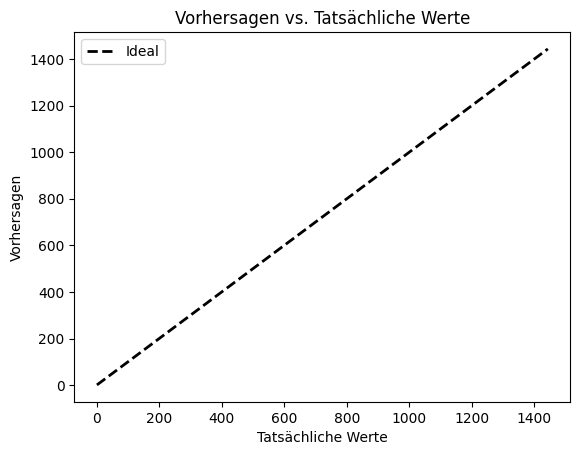

In [12]:
import matplotlib.pyplot as plt

# Annahme: Ihre Vorhersagen befinden sich in der Spalte 'predicted_tsolve' des DataFrame df
# Die tatsächlichen Werte sind in der Spalte 'tsolve'

# Sortieren Sie die Daten nach den tatsächlichen Werten für eine klare Darstellung
df_sorted = df.sort_values(by='tsolve')

# Scatter Plot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(df_sorted['tsolve'], df_sorted['predicted_tsolve'], alpha=0.5)
plt.plot([df_sorted['tsolve'].min(), df_sorted['tsolve'].max()], [df_sorted['tsolve'].min(), df_sorted['tsolve'].max()], '--k', linewidth=2, label='Ideal')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()
